# Stock Market Sentiment - Extensive Exploratory Data Analysis

This notebook provides a detailed exploration of the Stock Market Sentiment dataset, covering data quality, label distribution, text characteristics, and feature importance. It also includes a comparative analysis of different machine learning models, including hyperparameter tuning for a Neural Network.

In [20]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import certifi
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

## 1. Data Acquisition & Quality Check

In [21]:
DATA_PATH = "../data/stock_data.csv"
if not os.path.exists(DATA_PATH):
    DATA_PATH = "data/stock_data.csv"

df = pd.read_csv(DATA_PATH)

print("### Data Information ###")
df.info()

print("\n### Missing Values ###")
print(df.isnull().sum())

print("\n### Sample Data ###")
df.head()

### Data Information ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB

### Missing Values ###
Text         0
Sentiment    0
dtype: int64

### Sample Data ###


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


## 2. Target Variable Analysis

C:\Users\UNIVERSO\AppData\Local\Temp\ipykernel_10336\3523756131.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment_Label', palette='husl')


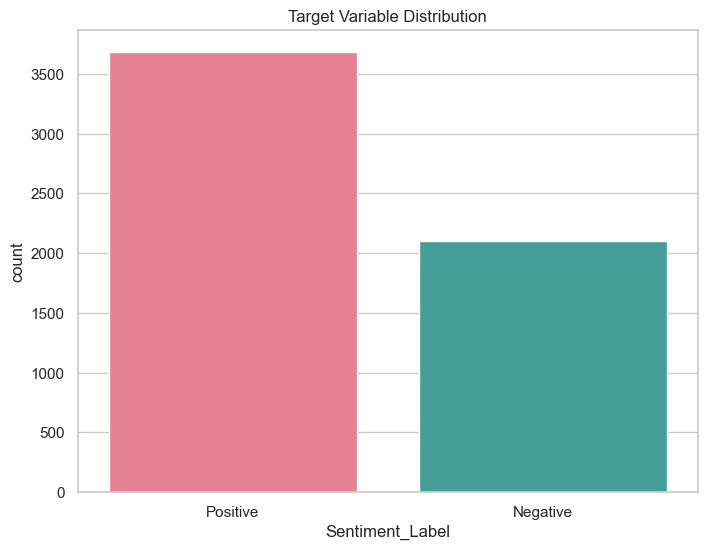

In [22]:
df['Sentiment_Label'] = df['Sentiment'].map({1: 'Positive', -1: 'Negative'})
df['Sentiment'] = df['Sentiment'].map({1: 1, -1: 0})

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment_Label', palette='husl')
plt.title('Target Variable Distribution')
plt.show()

## 2.1 Custom Visualizations (Class Distribution & Text Length)

C:\Users\UNIVERSO\AppData\Local\Temp\ipykernel_10336\758661162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


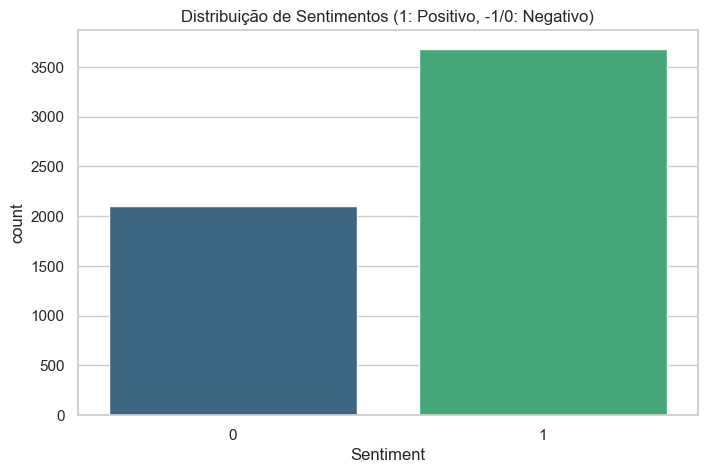

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Distribuição das Classes
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribuição de Sentimentos (1: Positivo, -1/0: Negativo)')
plt.show()

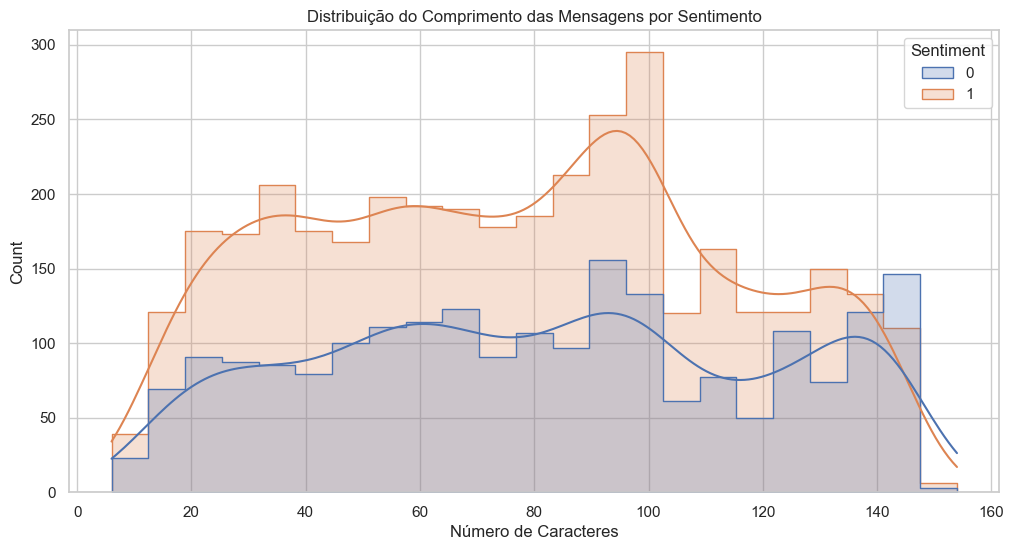

In [24]:
# 2. Comprimento do Texto por Sentimento
df['text_len'] = df['Text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='text_len', hue='Sentiment', kde=True, element="step")
plt.title('Distribuição do Comprimento das Mensagens por Sentimento')
plt.xlabel('Número de Caracteres')
plt.show()

## 3. Word Clouds

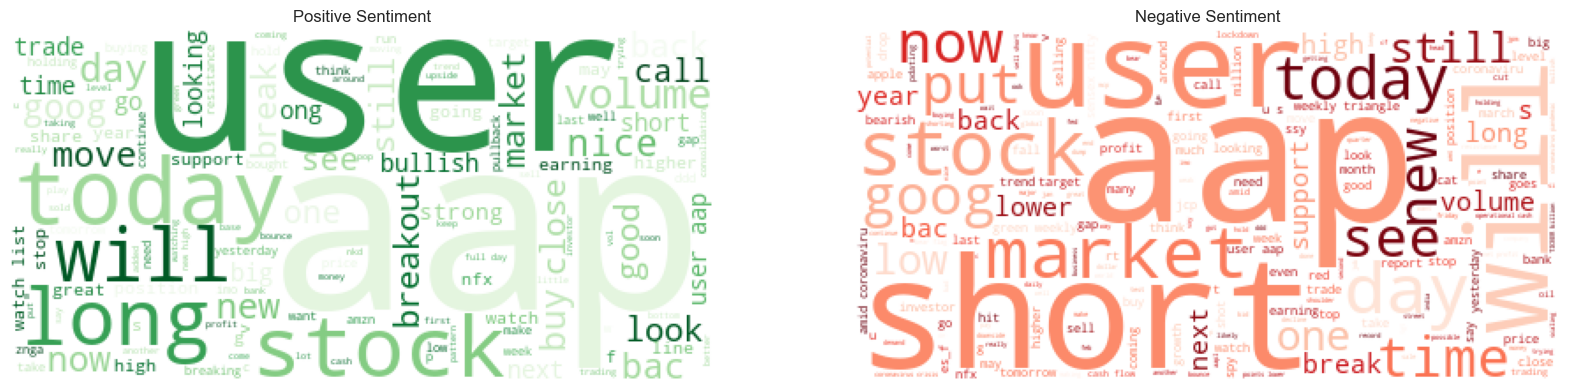

In [25]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\$\w+', 'TICKER', text)
    text = re.sub(r'http\S+', '', text)
    return text.strip()

df['cleaned_text'] = df['Text'].apply(clean_text)

pos_text = " ".join(df[df['Sentiment'] == 1]['cleaned_text'])
neg_text = " ".join(df[df['Sentiment'] == 0]['cleaned_text'])

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
wc_pos = WordCloud(background_color='white', colormap='Greens').generate(pos_text)
ax[0].imshow(wc_pos)
ax[0].set_title('Positive Sentiment')
ax[0].axis('off')

wc_neg = WordCloud(background_color='white', colormap='Reds').generate(neg_text)
ax[1].imshow(wc_neg)
ax[1].set_title('Negative Sentiment')
ax[1].axis('off')
plt.show()

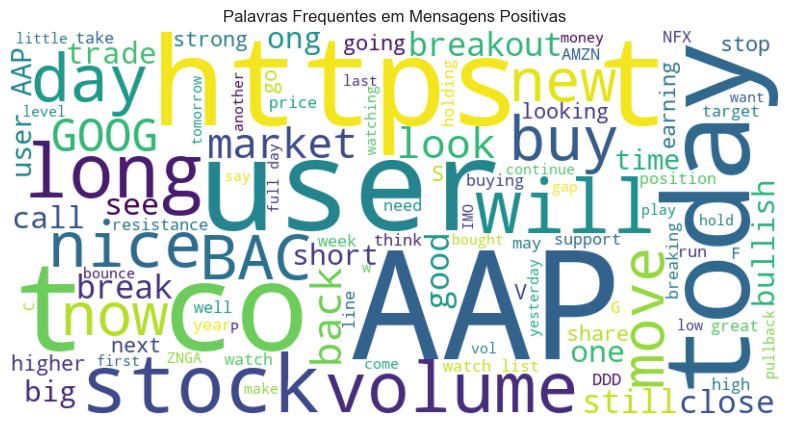

In [26]:
# 3. WordCloud para Sentimento Positive
pos_text = " ".join(df[df['Sentiment'] == 1]['Text'])
wc = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(pos_text)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras Frequentes em Mensagens Positivas')
plt.show()

## 4. Model Training & Parameter Tuning

In this section, we compare multiple models and perform hyperparameter tuning.

In [27]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Linear SVC": LinearSVC(class_weight='balanced', max_iter=2000),
    "Neural Network (MLP)": MLPClassifier(max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average='macro')
    print(f"{name} Macro F1-Score: {score:.4f}")

Logistic Regression Macro F1-Score: 0.7722
Linear SVC Macro F1-Score: 0.7613
Neural Network (MLP) Macro F1-Score: 0.7461


### 4.1 Neural Network Tuning

Tune the specific parameters of the Multi-Layer Perceptron (MLP) Neural Network, such as layer sizes and learning rate.

In [28]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001]
}

print()
grid_search = GridSearchCV(MLPClassifier(max_iter=300, random_state=42), param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_:.4f}")


Best Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01}
Best F1 Score: 0.7284


## 5. Feature Importance Analysis

Analyze which words contribute most to positive and negative sentiment by examining the coefficients of the Logistic Regression model. This provides explainability for our classification results.

In [30]:
# Use Logistic Regression for Feature Importance
# We re-fit on the full training set for stable coefficients
lr = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

feature_names = vectorizer.get_feature_names_out()
coefficients = lr.coef_[0]

# Create a DataFrame for visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

C:\Users\UNIVERSO\AppData\Local\Temp\ipykernel_10336\1386756934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feat_df.head(20), palette='viridis')
C:\Users\UNIVERSO\AppData\Local\Temp\ipykernel_10336\1386756934.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feat_df.tail(20), palette='magma')


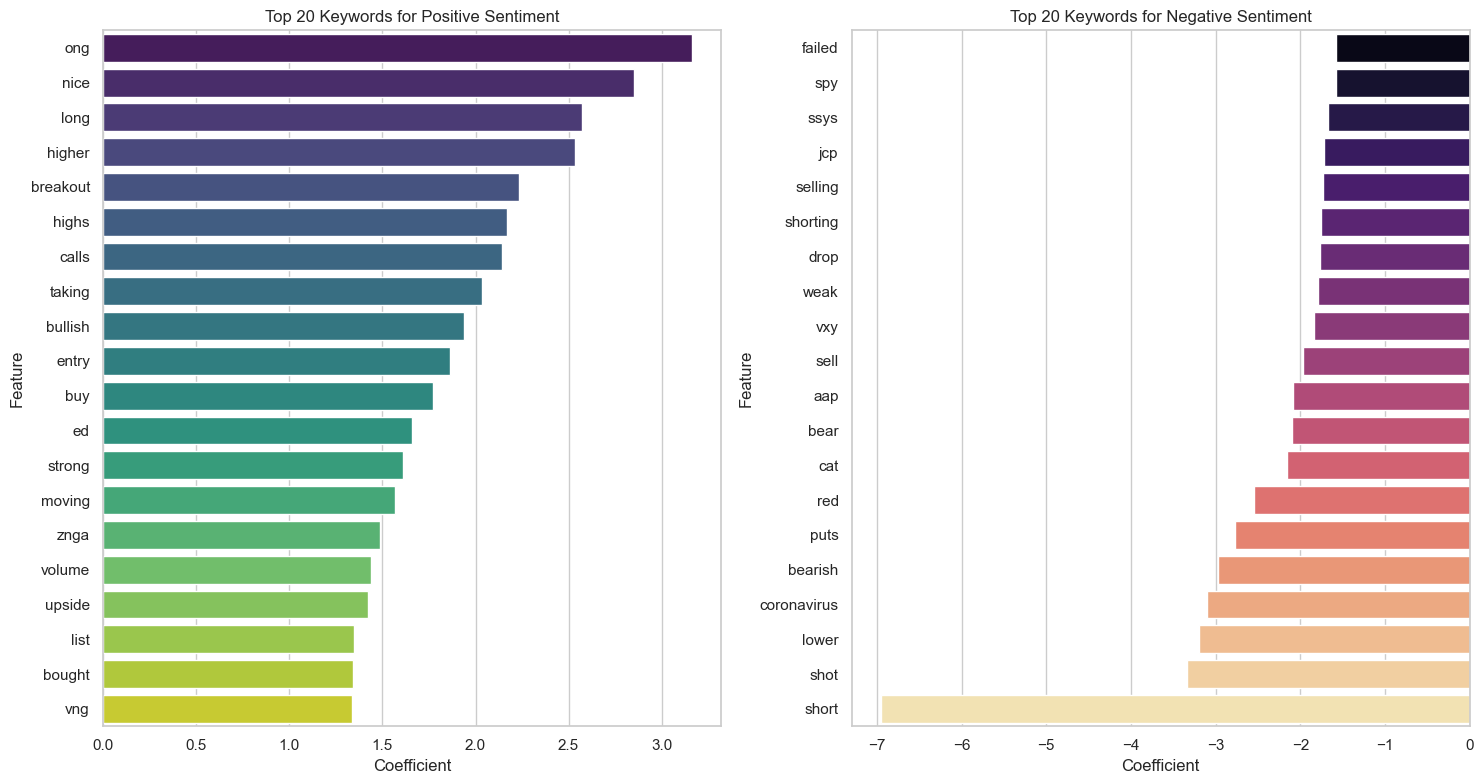

In [31]:
plt.figure(figsize=(15, 8))

# Top 20 Positive Features
plt.subplot(1, 2, 1)
sns.barplot(x='Coefficient', y='Feature', data=feat_df.head(20), palette='viridis')
plt.title('Top 20 Keywords for Positive Sentiment')

# Top 20 Negative Features
plt.subplot(1, 2, 2)
sns.barplot(x='Coefficient', y='Feature', data=feat_df.tail(20), palette='magma')
plt.title('Top 20 Keywords for Negative Sentiment')

plt.tight_layout()
plt.show()

## 6. Export of Training Logic

The complete pipeline for downloading data, preprocessing, hyperparameter tuning: `train.py`.

This script is optimized for production use, ensuring that the model artifact (`model.bin`) 